<a href="https://colab.research.google.com/github/hyj378/011/blob/ML_basic_inyt/%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#퍼셉트론 알고리즘
신경망의 기원이 되는 알고리즘

In [0]:
#AND게이트
def AND(x1, x2):
  X = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp  = np.sum(w * X) + b
  if tmp <= 0:
    return 0
  else:
    return 1
  
  
#OR게이트
def OR([x1, x2]):
  X = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.3
  tmp = np.sum(w * X) + b
  if tmp <= 0:
    return 0
  else:
    return 1
  

#NAND게이트
def NAND(x1, x2):
  X = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = 0.7
  tmp = np.sum(w * X) + b
  if tmp <= 0:
    return 0
  else:
    return 1
  
#위의 회로 :tmp라는 1차함수로 영역을 구분해 1과 0값을 반환
#XOR게이트 -> 두 회로의 결합으로 구현 가능
def XOR(x1, x2):
  s1 = NAND(x1, x2) #가중치1
  s2 = OR(x1, x2)   #가중치2
  y = AND(s1 ,s2)
  return y
#2층 퍼셉트론 구조
#비선형함수를 여러개의 1차함수를 통해 구현
#다충퍼셉트론 -> 2진수를 10진수로 변환하는 인코더, 2진수 연산 처리기 -> 컴퓨터
#AND,OR게이트 ->반가산기 전가산기->산술 논리 연산장치(ALU)->CPU

#퍼셉트론과 신경망
퍼셉트론의 작동과정

입력값([x1, x2])->가중치와 편향을 수동으로 입력해 값(a) 생성->a를 활성화 함수에 대입->y값(출력값) 출력

다음은 활성화 함수의 예시이다

###일차함수

<function matplotlib.pyplot.show>

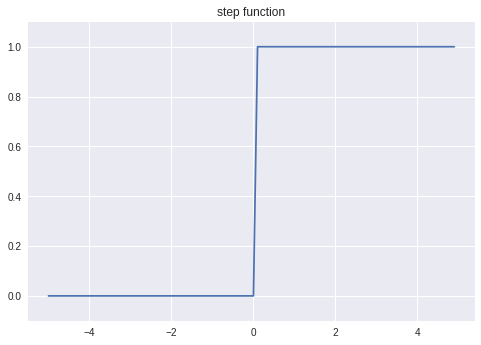

In [5]:
#계단함수
def step_function(x):
  y = x > 0   #bool값
  y = y.astype(np.int) #numpy함수
  return y

import numpy as np
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1) #-0.5<= x < 0.5 (step=0.1)
y = step_function(x)
plt.title("step function")
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show

###시그모이드 함수 : sigmoid

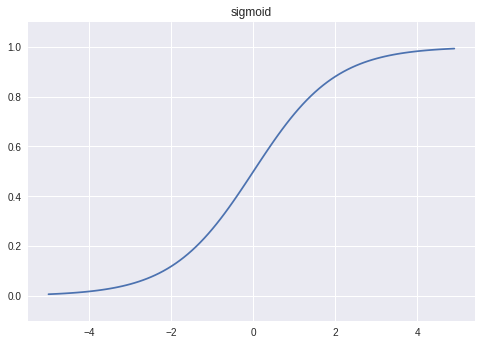

2차원 백터값 [x1, x2]를 두 영역으로 구분할 수 있다


In [16]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))   #파이썬의 브로드케스트 기능 응용


x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.title("sigmoid")
plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y축 범위 지정
plt.show()

print("2차원 백터값 [x1, x2]를 두 영역으로 구분할 수 있다")

###ReLU함수
sigmoid함수는 일정구간을 제외하고는 기울기값이 작다
따라서 미분값을 이용한 학습방법인 오차역전파법(backward propagation of error)에 부적절하다
이를 해결하기 위해 기울기값에 손실이 없는 ReLU함수가 등장하였다.

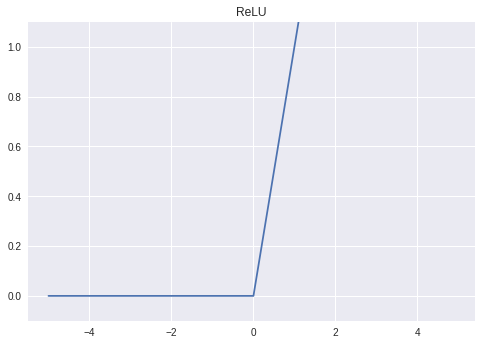

In [18]:
def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.title("ReLU")
plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y축 범위 지정
plt.show()

###softmax함수
softmax함수는 one-hot과 같이 n개의 class로 나눌때 사용한다.
x1을 가중치와 편향을 통해 중요도가 반영되도록 수정한 후(a1), 
이를 softmax함수를 통해 classA에 a1, a2...an의 반영비율을 구할 수 있고,
이를 one-hot을 이용해 하나의 값으로 정할 수 있다.
또 softmax변환값의 합은 1이여서 확률계산에 적합하다.

In [40]:
#exp(a)값이 너무 커 발생하는 오버플로 문제를 해결하기 위해 변수 c를 사용한다.
def softmax(a): #a는 보정이 끝난 값 (a = x*w + b)
  c = np.max(a) #입력신호 (a)중 최댓값
  exp_a = np.exp(a - c)
  sum_exp_as = np.sum(exp_a)
  y = exp_a / sum_exp_as
  
  return y

print("만약 a가 (n, m)배열이라면 (n, m)배열 반환")
a = np.zeros((2, 3))
print("입력배열: ", a.shape, "출력배열: ", softmax(a).shape)

만약 a가 (n, m)배열이라면 (n, m)배열 반환
입력배열:  (2, 3) 출력배열:  (2, 3)


###퍼셉트론과 신경망
신경망에서는 활성화 함수로 위와같은 비선형함수를 이용한다.
퍼셉트론은 활성화함수로 계단함수를 이용하는데 계단함수는 미분이 불가능한 특정지점을 제외하고 미분값이 모두 '0'이다. 따라서 오차역전파법을 이용한 학습이 불가능하기 때문에 가중치나 편향을 직접 계산해야 한다.



그러나 ReLU, sigmoid와 같은 함수를 활성화 함수로 이용하면, 미분값이 0이 아니기 때문에 오차역전파법을 통해
각 노드가 결과에 얼마만큼의 영향을 미치는지  연쇄법칙을 통해 알 수 있으며, 따라서 각 노드의 δy/δ(node)를 이용해 기계의 자동적인 미지수(가중치, 편향)의 최적화가 가능해지는 것이다. 이를 학습이라 한다

###행렬과 브로드케스트

In [28]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

if A.shape == B.shape:
  print(A.shape)
  print(np.dot(A, B)) #행렬 곱 A * B

(2, 2)
[[19 22]
 [43 50]]


In [37]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
C = np.array([[1, 2], [3, 4]])
             
print(A.shape ,"*" , B.shape)
print(np.dot(A, B))

print(A.shape ,"*" , C.shape)
print(np.dot(A, C))

(2, 3) * (3, 2)
[[22 28]
 [49 64]]
(2, 3) * (2, 2)


ValueError: ignored

#신경망 구현
신경망은 각 node의 입력값이 가중치와 활성함수등을 통해 다음 node의 입력값으로 출력되는 완전이분그래프(complete bipartite graph)이다. 학습과정시에는 30%의 노드를 비활성화 하거나, 노드의 층을 건너 뛰는 등 결과값에 영향을 미치는 노드를 줄여 각노드의 편미분값의 손실을 줄이려한다 

<br>
이렇게 학습된 신경망 모델은 회귀, 분류에 모두 이용될 수 있다.<br>
출력층의 활성함수는<br>
회귀(예측)에는 보통 결과값을 그대로 출력하는 항등함수를, <br>
분류에는 결과값을 원하는n개의 class로 나눌 수 있는 softmax함수를 이용한다.